In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import prepare as p

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [3]:
df = p.date_index(df)
df.head()

/Users/goat/codeup-data-science/time-series-exercises/prepare.py:59: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('+', '_')


,consumption,wind,solar,wind_solar,month,day,year
date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,Sunday,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,Monday,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,Tuesday,2006
2006-01-04,1457.217,NaN,NaN,NaN,January,Wednesday,2006
2006-01-05,1477.131,NaN,NaN,NaN,January,Thursday,2006


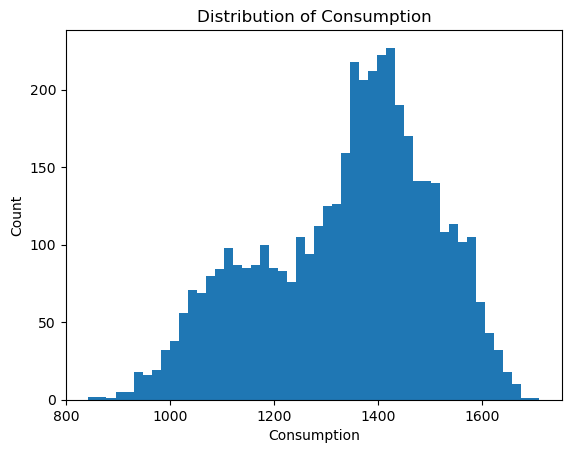

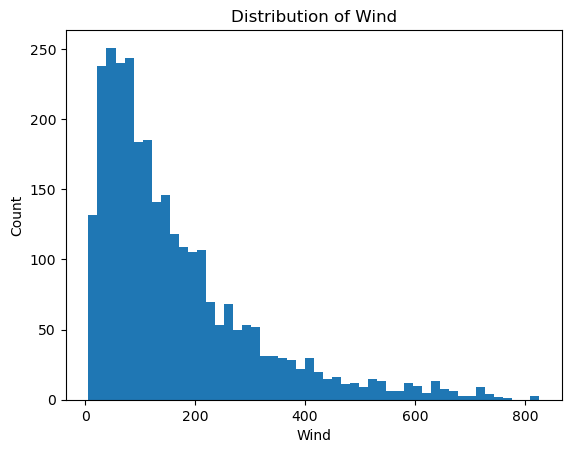

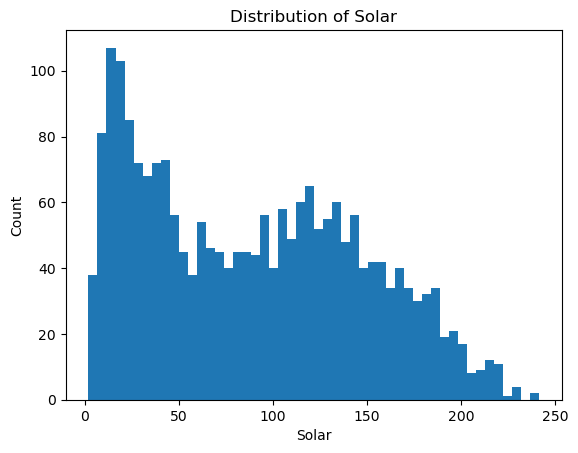

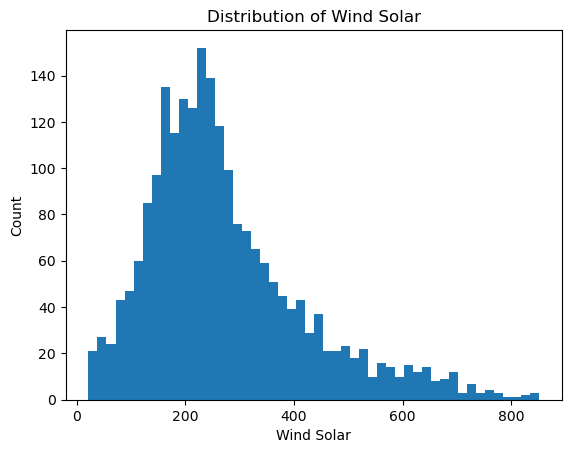

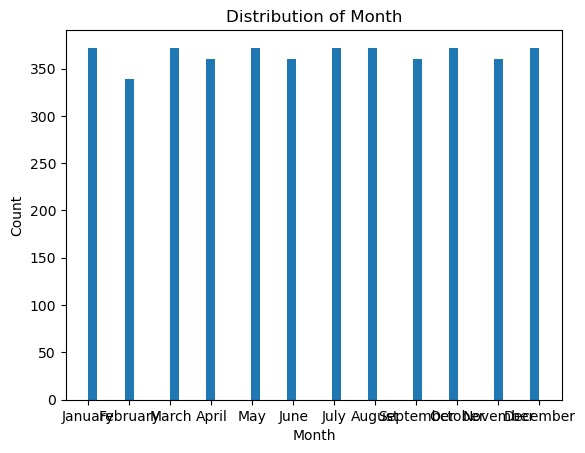

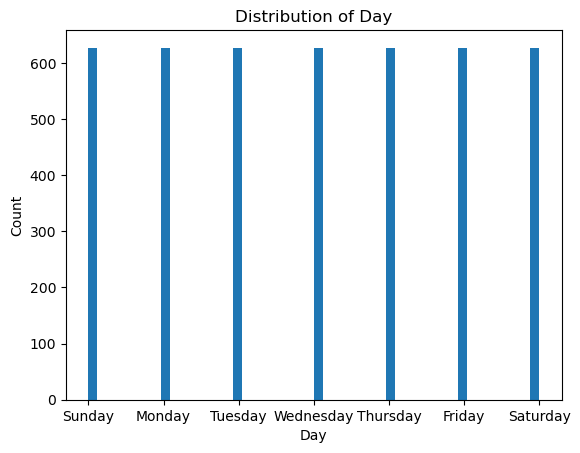

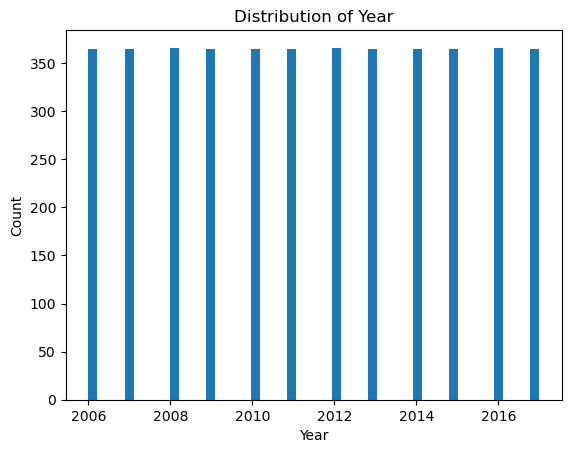

In [4]:
p.plt_dist(df, 'wind', loop = True)

In [5]:
df.wind = df.wind.bfill()
df.solar = df.solar.bfill()
df['wind_solar'] = df['wind_solar'].bfill()


In [6]:
p.summarize(df)

Shape (4383, 7)
Date Range 2006-01-01 00:00:00 to 2017-12-31 00:00:00

_________________________________________________



Number of rows: 4383
Number of days between first and last day: 4383 days 00:00:00

_________________________________________________



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   object 
 5   day          4383 non-null   object 
 6   year         4383 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 273.9+ KB

_________________________________________________




consumption    0
wind           0
solar          0
wind_solar     0
month          0
day            0
year           0
dtype: int64

_________________________________________________




1103.82300    2
1597.27500    2
1383.50400    2
1348.18800    2
1350.43900    2
             ..
1493.43200    1
1489.44000    1
1380.07100    1
1240.76200    1
1107.11488    1
Name: consumption, Length: 4374, dtype: int64

_________________________________________________




48.709     1462
96.107        2
229.770       2
22.425        2
287.698       2
           ... 
19.479        1
33.386        1
64.503        1
87.273        1
721.176       1
Name: wind, Length: 2913, dtype: int64

_________________________________________________




6.587      2192
128.002       3
112.798       3
188.273       2
85.920        2
           ... 
41.011        1
10.548        1
11.752        1
25.286        1
19.980        1
Name: solar, Length: 2185, dtype: int64

_________________________________________________




234.052    2192
126.936       3
191.456       3
259.146       2
187.626       2
           ... 
436.747       1
59.984        1
203.308       1
560.621       1
741.156       1
Name: wind_solar, Length: 2185, dtype: int64

_________________________________________________




January      372
March        372
May          372
July         372
August       372
October      372
December     372
April        360
June         360
September    360
November     360
February     339
Name: month, dtype: int64

_________________________________________________




Sunday       627
Monday       626
Tuesday      626
Wednesday    626
Thursday     626
Friday       626
Saturday     626
Name: day, dtype: int64

_________________________________________________




2008    366
2012    366
2016    366
2006    365
2007    365
2009    365
2010    365
2011    365
2013    365
2014    365
2015    365
2017    365
Name: year, dtype: int64

_________________________________________________



In [7]:
train = df.loc[:'2015']
validate = df.loc['2016']
test = df.loc['2017']

train.shape, validate.shape, test.shape

((3652, 7), (366, 7), (365, 7))

In [8]:
train.head()

,consumption,wind,solar,wind_solar,month,day,year
date,,,,,,,
2006-01-01,1069.184,48.709,6.587,234.052,January,Sunday,2006
2006-01-02,1380.521,48.709,6.587,234.052,January,Monday,2006
2006-01-03,1442.533,48.709,6.587,234.052,January,Tuesday,2006
2006-01-04,1457.217,48.709,6.587,234.052,January,Wednesday,2006
2006-01-05,1477.131,48.709,6.587,234.052,January,Thursday,2006


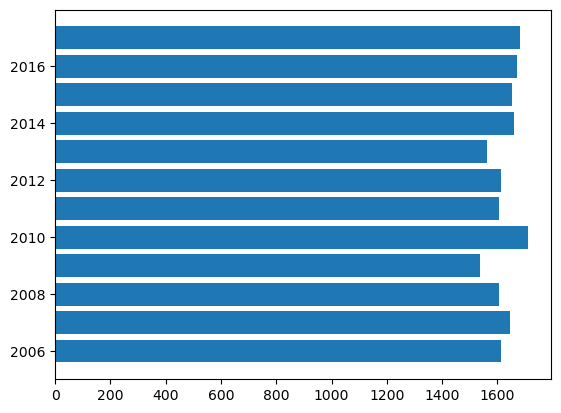

In [19]:
plt.barh(width= df.consumption, y= df.year)
plt.show()

In [16]:
train.groupby('day').consumption.sum()

day
Friday       721510.229
Monday       721516.725
Saturday     621505.983
Sunday       571461.594
Thursday     736576.095
Tuesday      741000.790
Wednesday    743181.048
Name: consumption, dtype: float64

In [15]:
day_sums = train.groupby('day').consumption.sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_sums

day
Monday       721516.725
Tuesday      741000.790
Wednesday    743181.048
Thursday     736576.095
Friday       721510.229
Saturday     621505.983
Sunday       571461.594
Name: consumption, dtype: float64

In [17]:
day_sums.index = [day[:3] for day in day_sums.index]
day_sums

Mon    721516.725
Tue    741000.790
Wed    743181.048
Thu    736576.095
Fri    721510.229
Sat    621505.983
Sun    571461.594
Name: consumption, dtype: float64

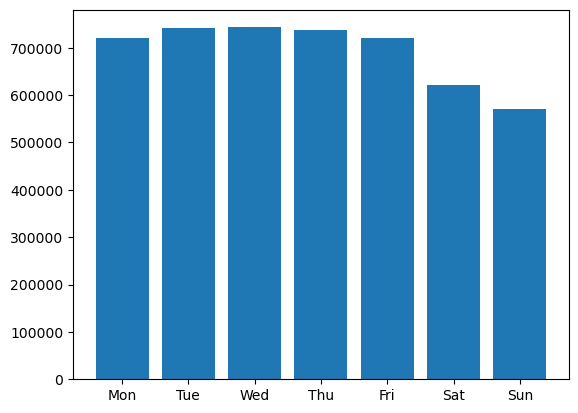

In [18]:
plt.bar(x=day_sums.index, height=day_sums)
plt.show()

In [20]:
day_sample = train.resample('d').consumption.sum()
day_sample.head()

date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Freq: D, Name: consumption, dtype: float64

<Axes: xlabel='date'>

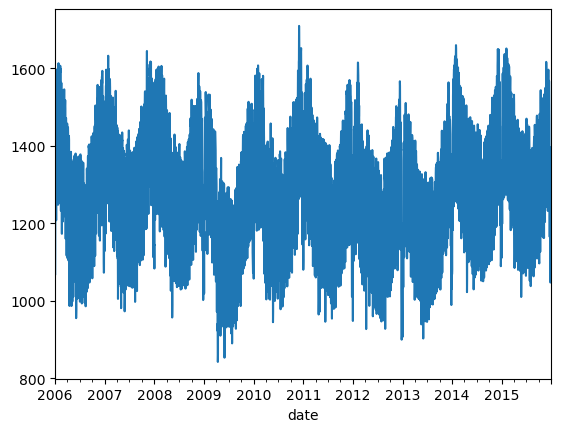

In [22]:
day_sample.plot()

In [26]:
month_sample = train.resample('m').consumption.sum()
month_sample.head()

date
2006-01-31    45304.704
2006-02-28    41078.993
2006-03-31    43978.124
2006-04-30    38251.767
2006-05-31    38858.143
Freq: M, Name: consumption, dtype: float64

<Axes: xlabel='date'>

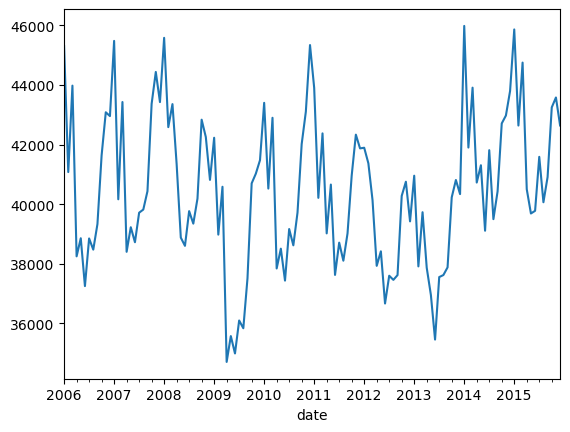

In [24]:
month_sample.plot()